# Straight Line of Stock Histocial Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore") 

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'


# Read data 
dataset = yf.download(symbol)['Adj Close']

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


Date
1980-03-17    3.145833
1980-03-18    3.031250
1980-03-19    3.041667
1980-03-20    3.010417
1980-03-21    2.916667
Name: Adj Close, dtype: float64

In [3]:
df = dataset.reset_index()

In [4]:
df.head()

,Date,Adj Close
0,1980-03-17,3.145833
1,1980-03-18,3.031250
2,1980-03-19,3.041667
3,1980-03-20,3.010417
4,1980-03-21,2.916667


In [5]:
df.tail()

,Date,Adj Close
10748,2022-10-31,60.060001
10749,2022-11-01,59.660000
10750,2022-11-02,58.630001
10751,2022-11-03,60.110001
10752,2022-11-04,62.740002


In [6]:
max_p = df['Adj Close'].max()
min_p = df['Adj Close'].min()
avg_p = df['Adj Close'].mean()

In [7]:
data = df.drop(['Date'], axis=1)
data

,Adj Close
0,3.145833
1,3.031250
2,3.041667
3,3.010417
4,2.916667
...,...
10748,60.060001
10749,59.660000
10750,58.630001
10751,60.110001


In [8]:
data = data.reset_index()

In [10]:
data.values

array([[0.00000000e+00, 3.14583302e+00],
       [1.00000000e+00, 3.03125000e+00],
       [2.00000000e+00, 3.04166698e+00],
       ...,
       [1.07500000e+04, 5.86300011e+01],
       [1.07510000e+04, 6.01100006e+01],
       [1.07520000e+04, 6.27400017e+01]])

In [11]:
from numpy import ones,vstack
from numpy.linalg import lstsq

In [14]:
points = data.values

In [15]:
x_coords, y_coords = zip(*points)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]


In [16]:
print("Line Equation is y = {m}x + {c}".format(m=m,c=c))


Line Equation is y = 0.002951224216893689x + 0.16966915402459476


In [17]:
equation_of_line = print("y = {m}x + {c}".format(m=m,c=c))


y = 0.002951224216893689x + 0.16966915402459476


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


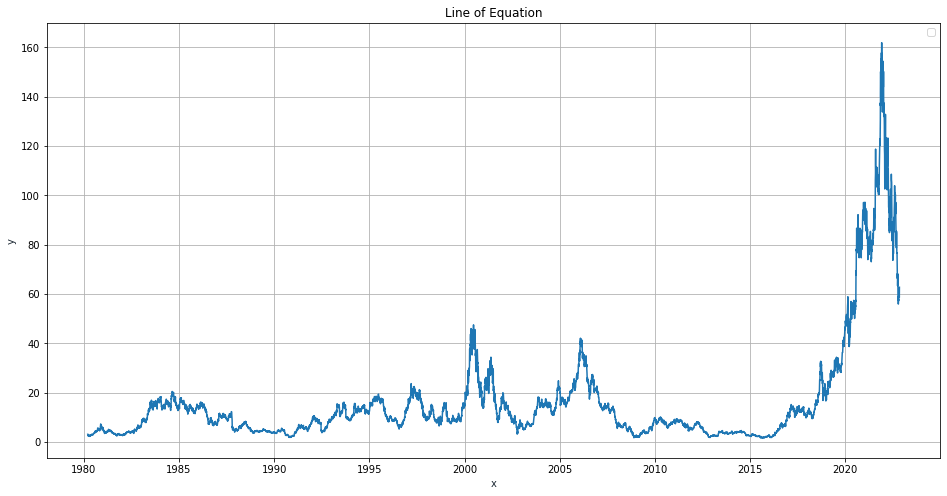

In [18]:
plt.figure(figsize=(16,8))
plt.plot(dataset)
plt.title('Line of Equation', equation_of_line)
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='best')
plt.grid()
plt.show()